<a href="https://colab.research.google.com/github/Bess-Hub/Project-Citizen-Explorer/blob/main/Brazil_Lower_House.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis with Google Colab


---

*In this exercise we will explore the data provided by the Brazilian Lower House API using Google Colab, because I had issues with Jupyter.*




# Phase 1: Data Extraction


*As any Data Analysis project we will start with Data Extraction.*


Import modules:

In [1]:
import requests # To get the API URL
import pandas as pd # To test what I am learning on my course
import xml.etree.ElementTree as ET # Because so far it is my way of reading into XML files returned by an API

Define the API URL:

In [2]:
Base_URL = requests.get(url="https://www.camara.gov.br/SitCamaraWS/Deputados.asmx/ObterDeputados")

## Some additional steps:

Check the connection:

In [3]:
print(Base_URL)

<Response [200]>


Let's check what is the data we will be working with:

In [4]:
print(Base_URL.headers.get('content-type'))

text/xml; charset=utf-8


## Visualizing the extracted data

Since the data is in XML we will use ElementTree to create a local DataFrame from the API.

In [5]:
root = ET.fromstring(Base_URL.content) # Define the root channel to the content we want to append to our lists
# Create the lists
dep_name = []
dep_id = []
dep_foto = []
dep_uf = []
dep_gender = []
dep_part = []
# Add elements to the correspondent lists
for name in root.iter('nomeParlamentar'):
    dep_name.append(name.text)
for id in root.iter('ideCadastro'):
    dep_id.append(id.text)
for urlFoto in root.iter('urlFoto'):
    dep_foto.append(urlFoto.text)
for uf in root.iter('uf'):
    dep_uf.append(uf.text)
for sexo in root.iter('sexo'):
    dep_gender.append(sexo.text)
for part in root.iter('partido'):
    dep_part.append(part.text)

Now we create one dataframe using Pandas.

In [6]:
Deputados = pd.DataFrame({'Name': dep_name, 'ID': dep_id, 'Foto': dep_foto, 'UF': dep_uf, 'Gender': dep_gender, 'Party': dep_part})

Because everything is in a certain order, if we give the folowing command we can see line by line each congressperson information in our DataFrame.

In [7]:
Deputados.head(513) # I don't understand why it only shows 5 if I do not declare the total number of entire there, tried with * for all, but did not work.

,Name,ID,Foto,UF,Gender,Party
0,Benedita da Silva,73701,http://www.camara.gov.br/internet/deputado/ban...,RJ,feminino,PT
1,Átila Lins,74090,http://www.camara.gov.br/internet/deputado/ban...,AM,masculino,PSD
2,Renildo Calheiros,73801,http://www.camara.gov.br/internet/deputado/ban...,PE,masculino,PCdoB
3,Jandira Feghali,74848,http://www.camara.gov.br/internet/deputado/ban...,RJ,feminino,PCdoB
4,Lídice da Mata,139285,http://www.camara.gov.br/internet/deputado/ban...,BA,feminino,PSB
...,...,...,...,...,...,...
508,Leônidas Cristino,74299,http://www.camara.gov.br/internet/deputado/ban...,CE,masculino,PDT
509,Luciano Azevedo,103758,http://www.camara.gov.br/internet/deputado/ban...,RS,masculino,PSD
510,Gabriel Mota,224117,http://www.camara.gov.br/internet/deputado/ban...,RR,masculino,REPUBLICANOS
511,Welter,224333,http://www.camara.gov.br/internet/deputado/ban...,PR,masculino,PT


We could wish to select only the first 10, for example:

In [8]:
Deputados.head(10)

,Name,ID,Foto,UF,Gender,Party
0,Benedita da Silva,73701,http://www.camara.gov.br/internet/deputado/ban...,RJ,feminino,PT
1,Átila Lins,74090,http://www.camara.gov.br/internet/deputado/ban...,AM,masculino,PSD
2,Renildo Calheiros,73801,http://www.camara.gov.br/internet/deputado/ban...,PE,masculino,PCdoB
3,Jandira Feghali,74848,http://www.camara.gov.br/internet/deputado/ban...,RJ,feminino,PCdoB
4,Lídice da Mata,139285,http://www.camara.gov.br/internet/deputado/ban...,BA,feminino,PSB
5,Júlio Cesar,74317,http://www.camara.gov.br/internet/deputado/ban...,PI,masculino,PSD
6,Claudio Cajado,74537,http://www.camara.gov.br/internet/deputado/ban...,BA,masculino,PP
7,Elcione Barbalho,74075,http://www.camara.gov.br/internet/deputado/ban...,PA,feminino,MDB
8,Arlindo Chinaglia,73433,http://www.camara.gov.br/internet/deputado/ban...,SP,masculino,PT
9,Mendonça Filho,74428,http://www.camara.gov.br/internet/deputado/ban...,PE,masculino,UNIÃO


Or we could wish to select only the ones from a specific UF, for example Paraná - that is represented by its acronym PR

In [9]:
Deputados.loc[Deputados['UF'] == 'PR']

,Name,ID,Foto,UF,Gender,Party
10,Dilceu Sperafico,73768,http://www.camara.gov.br/internet/deputado/ban...,PR,masculino,PP
29,Giacobo,74383,http://www.camara.gov.br/internet/deputado/ban...,PR,masculino,PL
98,Zeca Dirceu,160592,http://www.camara.gov.br/internet/deputado/ban...,PR,masculino,PT
111,Luiz Nishimori,162332,http://www.camara.gov.br/internet/deputado/ban...,PR,masculino,PSD
145,Aliel Machado,178927,http://www.camara.gov.br/internet/deputado/ban...,PR,masculino,PV
146,Diego Garcia,178929,http://www.camara.gov.br/internet/deputado/ban...,PR,masculino,REPUBLICANOS
147,Luciano Ducci,178931,http://www.camara.gov.br/internet/deputado/ban...,PR,masculino,PSB
148,Sergio Souza,178933,http://www.camara.gov.br/internet/deputado/ban...,PR,masculino,MDB
149,Toninho Wandscheer,178934,http://www.camara.gov.br/internet/deputado/ban...,PR,masculino,PP
176,Sargento Fahur,204387,http://www.camara.gov.br/internet/deputado/ban...,PR,masculino,PSD


We could want to verify if we have any missing data by asking for info().

In [10]:
Deputados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    513 non-null    object
 1   ID      513 non-null    object
 2   Foto    513 non-null    object
 3   UF      513 non-null    object
 4   Gender  513 non-null    object
 5   Party   513 non-null    object
dtypes: object(6)
memory usage: 24.2+ KB



Do you see how each column has the same number of elements: 513?
Knowing that there should be 513 Congresspersons, it seems that there is no missing information.



We could also request to describe the UF's, although the result should not bring any new information:
<br> 
*   There should be 513 Congresspersons.
*   Brazil has 26 UF's + the Federal District, so it should be 27 unique UF's.
*   Sao Paulo is the state with more congresspersons.
<br>
*What about those that are temporarily replacing a congressperson, would they be added to this list?*

In [11]:
Deputados['UF'].describe()

count     513
unique     27
top        SP
freq       70
Name: UF, dtype: object

But we can also want to see how they are gender classified:

In [12]:
Deputados['Gender'].value_counts()

masculino    426
feminino      87
Name: Gender, dtype: int64

And make a pie chart of it:

<Axes: ylabel='Gender'>

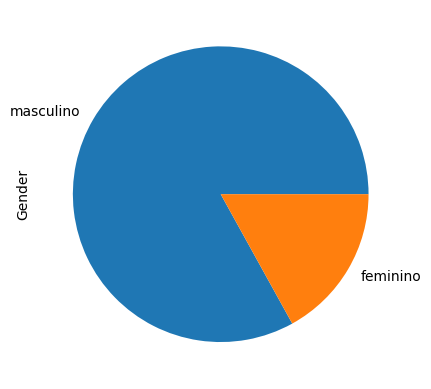

In [13]:
Deputados['Gender'].value_counts().plot(kind="pie")

This can get interesting when verifying the correlation between political party and gender, or UF and gender.

## Adding other sources of data

Let's use another endpoint to retrieve information such as the birth date and the level of studies of each congressperson.
<br>
For this, the URL has a static portion and a dynamic portion, that is the congressperson ID.

In [14]:
bdate = []
studies = []

Static_URL = "https://dadosabertos.camara.leg.br/api/v2/deputados/"

for i in Deputados['ID']:
    i_URL = Static_URL + str(i)
    response = requests.get(url=i_URL, headers={'Accept': 'text/xml'})
    print(response.content)
    root2 = ET.fromstring(response.content)
    for data in root2.iter('dataNascimento'):
      bdate.append(data.text)
    for info in root2.iter('escolaridade'):
      studies.append(info.text)

b'<xml><dados><id>73701</id><uri>https://dadosabertos.camara.leg.br/api/v2/deputados/73701</uri><nomeCivil>BENEDITA SOUZA DA SILVA SAMPAIO</nomeCivil><ultimoStatus><id>73701</id><uri>https://dadosabertos.camara.leg.br/api/v2/deputados/73701</uri><nome>Benedita da Silva</nome><siglaPartido>PT</siglaPartido><uriPartido>https://dadosabertos.camara.leg.br/api/v2/partidos/36844</uriPartido><siglaUf>RJ</siglaUf><idLegislatura>57</idLegislatura><urlFoto>https://www.camara.leg.br/internet/deputado/bandep/73701.jpg</urlFoto><email>dep.beneditadasilva@camara.leg.br</email><data>2023-02-01T12:05</data><nomeEleitoral>Benedita da Silva</nomeEleitoral><gabinete><nome>330</nome><predio>4</predio><sala>330</sala><andar>3</andar><telefone>3215-5330</telefone><email>dep.beneditadasilva@camara.leg.br</email></gabinete><situacao>Exerc\xc3\xadcio</situacao><condicaoEleitoral>Titular</condicaoEleitoral><descricaoStatus/></ultimoStatus><cpf>36293334787</cpf><sexo>F</sexo><urlWebsite/><redeSocial/><dataNascim

In [15]:
new_df = pd.DataFrame({'ID': dep_id, 'Birth Date': bdate, 'Scolarity': studies})

In [16]:
Deputados = Deputados.join(new_df, lsuffix="_left", rsuffix="_right", how='left')
Deputados.head()

,Name,ID_left,Foto,UF,Gender,Party,ID_right,Birth Date,Scolarity
0,Benedita da Silva,73701,http://www.camara.gov.br/internet/deputado/ban...,RJ,feminino,PT,73701,1942-04-26,Superior
1,Átila Lins,74090,http://www.camara.gov.br/internet/deputado/ban...,AM,masculino,PSD,74090,1950-11-22,Superior
2,Renildo Calheiros,73801,http://www.camara.gov.br/internet/deputado/ban...,PE,masculino,PCdoB,73801,1959-04-20,Superior
3,Jandira Feghali,74848,http://www.camara.gov.br/internet/deputado/ban...,RJ,feminino,PCdoB,74848,1957-05-17,Pós-Graduação
4,Lídice da Mata,139285,http://www.camara.gov.br/internet/deputado/ban...,BA,feminino,PSB,139285,1956-03-12,Superior


In [17]:
Deputados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        513 non-null    object
 1   ID_left     513 non-null    object
 2   Foto        513 non-null    object
 3   UF          513 non-null    object
 4   Gender      513 non-null    object
 5   Party       513 non-null    object
 6   ID_right    513 non-null    object
 7   Birth Date  513 non-null    object
 8   Scolarity   446 non-null    object
dtypes: object(9)
memory usage: 36.2+ KB


# Data Wrangling